In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

# new utils
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [26]:
df = pd.read_csv('data\kickstarter_projects.csv')
(df.head())

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [71]:
print('Overview:\n')

print(df.info())

print('---------------------------------------------------')
print('Dataset size:\n')
print(df.shape)
print('---------------------------------------------------')

print('Check for missing values:\n')
print(df.isnull().sum())

print('---------------------------------------------------')

print('Check for duplicates:\n')
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

print('---------------------------------------------------')

print('Unique states:\n')
df['Launched'] = pd.to_datetime(df['Launched'])
df['Deadline'] = pd.to_datetime(df['Deadline'])
print(df['State'].unique())

print('---------------------------------------------------')

print('Basic statistics:\n')
print(df.describe())


Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             374853 non-null  int64         
 1   Name           374853 non-null  object        
 2   Category       374853 non-null  object        
 3   Subcategory    374853 non-null  object        
 4   Country        374853 non-null  object        
 5   Launched       374853 non-null  datetime64[ns]
 6   Deadline       374853 non-null  datetime64[ns]
 7   Goal           374853 non-null  int64         
 8   Pledged        374853 non-null  int64         
 9   Backers        374853 non-null  int64         
 10  State          374853 non-null  object        
 11  Launched_Year  374853 non-null  int32         
 12  Deadline_Year  374853 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(4), object(5)
memory usage: 34.3+ MB
None
-------------

In [61]:
df.describe()

,ID,Launched,Deadline,Goal,Pledged,Backers
count,3.748530e+05,374853,374853,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,2014-09-26 12:22:30.728664320,2014-10-30 04:00:35.149778944,4.586378e+04,9.121073e+03,106.690359
min,5.971000e+03,2009-04-21 21:02:48,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2013-04-30 22:06:24,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,2014-12-02 19:02:35,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,2016-03-29 19:50:49,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,2018-01-02 15:02:31,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,219382.000000
std,6.191377e+08,NaN,NaN,1.158778e+06,9.132054e+04,911.718520


In [68]:
df['Launched_Year'] = df['Launched'].dt.year
df['Deadline_Year'] = df['Deadline'].dt.year
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Launched_Year,Deadline_Year
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009,2009
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009,2009
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009,2009
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009,2009
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009,2009


## Check for successful startups

In [84]:
# Analyze the Successful startups:
successful = df[df['State']=='Successful']
(successful.head())	

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Launched_Year,Deadline_Year
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009,2009
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009,2009
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,2009,2009
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,2009,2009
10,469734648,kicey to iceland,Photography,Photography,United States,2009-04-29 06:43:44,2009-06-17,350,1630,31,Successful,2009,2009


In [83]:
# Check for categories of successful startups:
total=(successful['Category'].value_counts().sum())
print(f'Total sum of successful categories: {total}\n')

print('---------------------------------------------------------\n')

print('Total sum of successful categories by type: \n')
print(successful['Category'].value_counts())


Total sum of successful categories: 133851

---------------------------------------------------------

Total sum of successful categories by type: 

Category
Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: count, dtype: int64


## Visual analysis of successful startups:

Text(0.5, 0, 'Count')

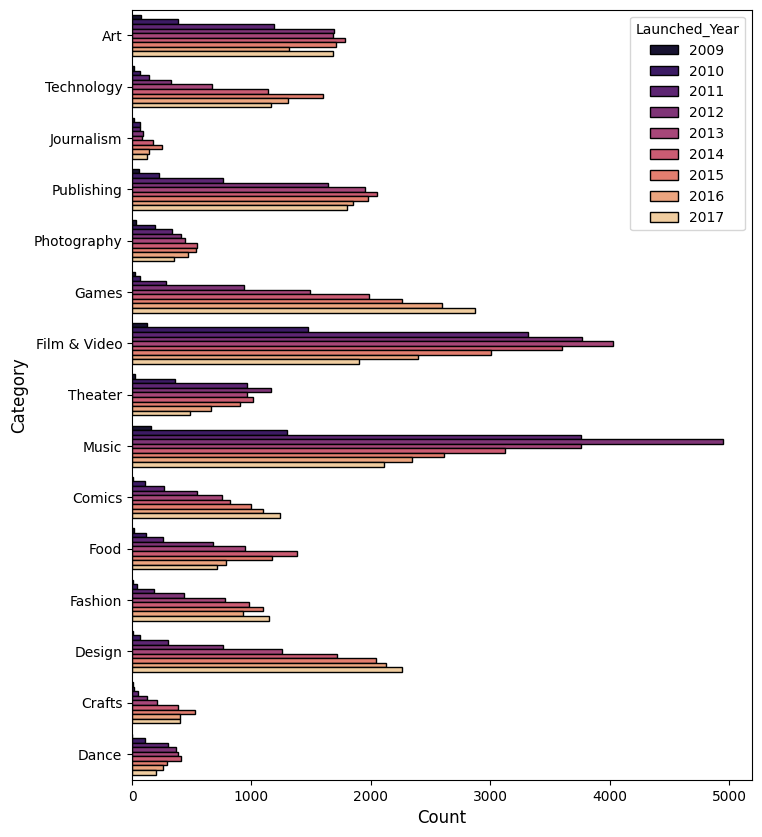

In [116]:

plt.figure(figsize=(8,10))
sns.countplot(data=successful, y='Category', hue='Launched_Year', palette='magma', edgecolor='black')
plt.ylabel('Category', fontsize=12)
plt.xlabel('Count', fontsize=12)

## Feature analysis for successful startups

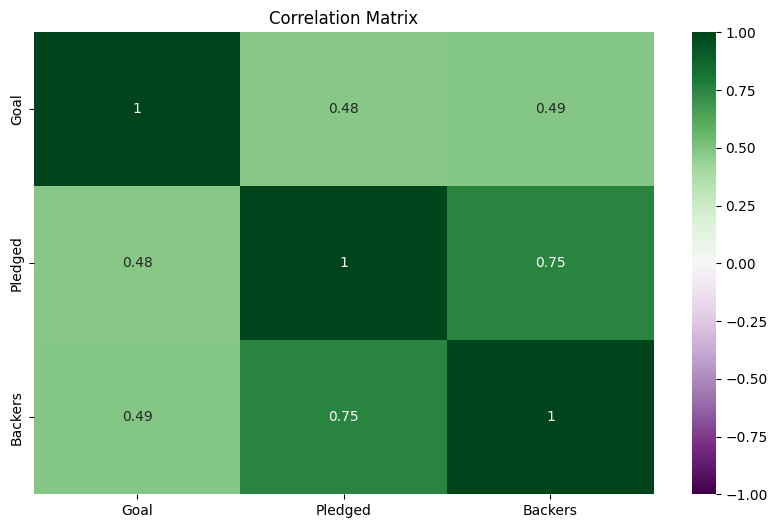

In [113]:
# Correlation matrix
correlation_matrix = successful[['Goal', 'Pledged', 'Backers']].corr().round(3)

# Display correlation matrix with a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PRGn', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()